In [1]:
import pickle
import torch

dpr_emb = pickle.load(open('../embeddings/nq_dev__dpr.p', 'rb'))
gtr_emb = pickle.load(open('../embeddings/nq_dev__gtr_base.p', 'rb'))

In [2]:
import struct
import numpy as np


def binary_str(num: float) -> str:
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))


def binary(num: float) -> np.ndarray:
    # adapted from https://stackoverflow.com/a/16444778
    s = binary_str(num)
    return np.array([int(c) for c in s])

binary(dpr_emb[0][0].item())

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

## visualizing embeddings

In [4]:
from tqdm.notebook import trange

def emb_to_binary(emb: np.ndarray) -> np.ndarray:
    out_arr = np.zeros((emb.shape[0], emb.shape[1], 32))
    out_arr.shape
    for i in trange(emb.shape[0]):
        for d in range(emb.shape[1]):
            out_arr[i, d] = binary(emb[i,d].item())
    return out_arr


dpr_emb_binary = emb_to_binary(dpr_emb)
gtr_emb_binary = emb_to_binary(gtr_emb)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

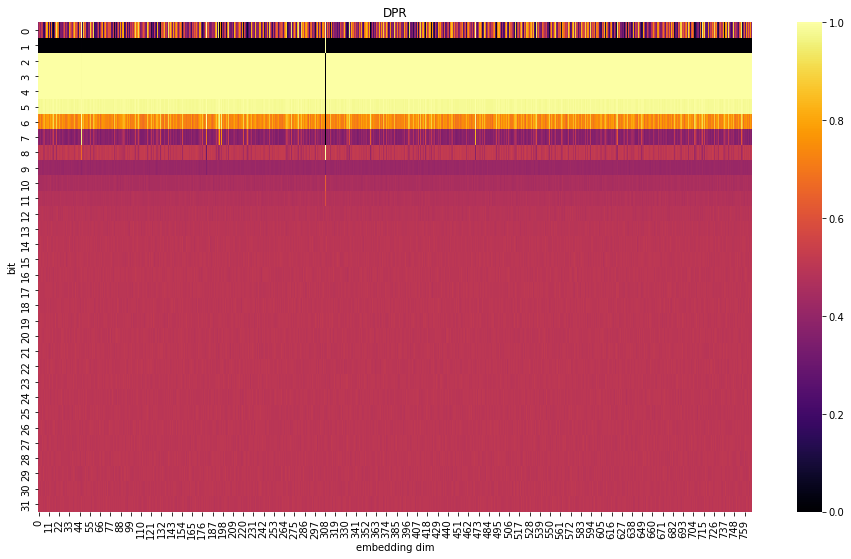

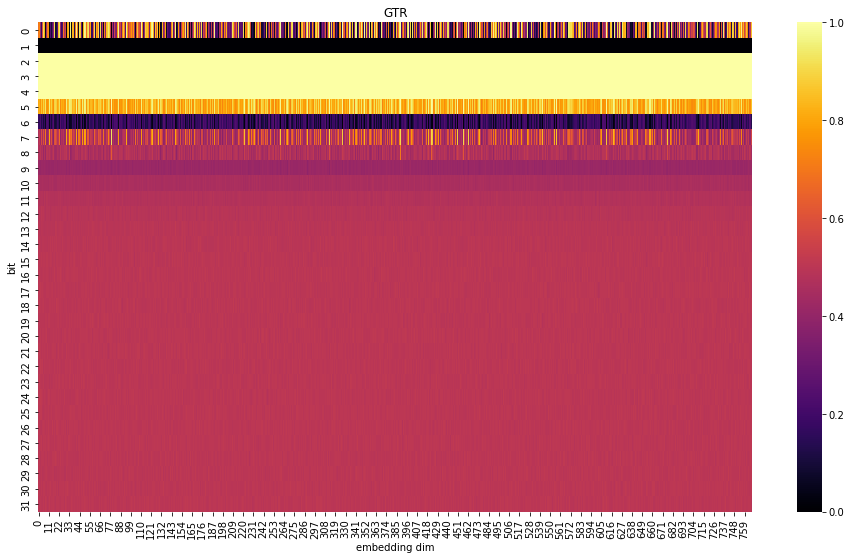

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_heatmap(data: np.ndarray, title: str):
    plt.figure(figsize=(16,9))
    avg_data = data.mean(axis=0) # average over dataset
    
    ax = sns.heatmap(avg_data.T, cmap='inferno')
    ax.set_title(title)
    ax.set_ylabel('bit')
    ax.set_xlabel('embedding dim')
    plt.show()
    return avg_data

dpr_avg_p = plot_heatmap(dpr_emb_binary, 'DPR')
gtr_avg_p = plot_heatmap(gtr_emb_binary, 'GTR')

## average number of bits

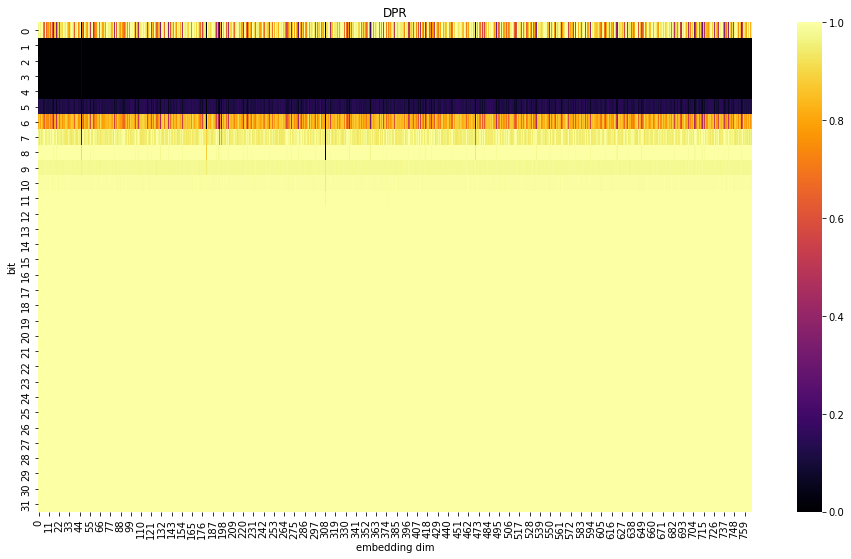

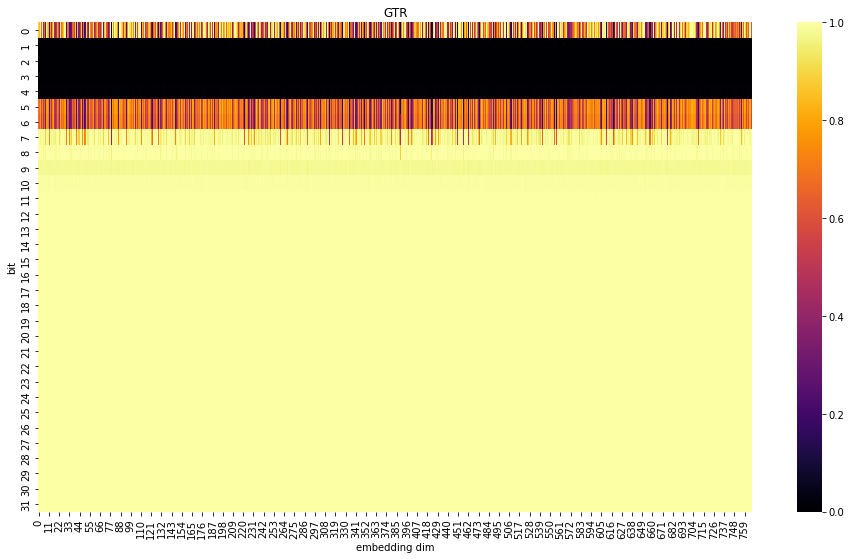

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

from math import log2

def get_bits(p: float) -> float:
    # entropy
    eps = 1e-16
    return -1 * ( p * log2(p + eps) + (1 - p) * log2(1-p + eps) )

def plot_heatmap(data: np.ndarray, title: str):
    plt.figure(figsize=(16,9))
    avg_data = data.mean(axis=0) # average over dataset
    
    bits = np.vectorize(get_bits)(avg_data)
    ax = sns.heatmap(bits.T, cmap='inferno')
    ax.set_title(title)
    ax.set_ylabel('bit')
    ax.set_xlabel('embedding dim')
    plt.show()
    return bits

dpr_avg_p = plot_heatmap(dpr_emb_binary, 'DPR')
gtr_avg_p = plot_heatmap(gtr_emb_binary, 'GTR')

In [41]:
from typing import Dict
def bit_totals(b: np.ndarray) -> Dict:
    assert len(b.shape) == 2
    return {
        'total': b.sum(),
        'total_per_token': b.sum() / 127,
        'avg': b.mean(),
        'avg_per_emb_dim': b.sum(axis=0).mean(),
        'avg_per_float_bit': b.sum(axis=1).mean(),
    }

In [42]:
bit_totals(dpr_avg_p)

{'total': 20476.102393862115,
 'total_per_token': 161.2291527075757,
 'avg': 0.8331747393335821,
 'avg_per_emb_dim': 639.8781998081906,
 'avg_per_float_bit': 26.661591658674627}

In [43]:
bit_totals(gtr_avg_p)

{'total': 20604.951471742515,
 'total_per_token': 162.24371237592533,
 'avg': 0.8384176217343146,
 'avg_per_emb_dim': 643.9047334919532,
 'avg_per_float_bit': 26.829363895498073}